In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("telecom_churn.csv")

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df["TotalCharges"].value_counts()

          11
20.2      11
19.75      9
20.05      8
19.9       8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: TotalCharges, Length: 6531, dtype: int64

In [6]:
df.drop(["customerID"],axis=1,inplace=True)

In [7]:
df["TotalCharges"].replace(" ",np.nan,inplace=True)

In [8]:
df["TotalCharges"].value_counts()

20.2      11
19.75      9
20.05      8
19.9       8
19.65      8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: TotalCharges, Length: 6530, dtype: int64

In [9]:
df["TotalCharges"]=df["TotalCharges"].astype(float)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [11]:
n=df["TotalCharges"].median()
df["TotalCharges"].fillna(n,inplace=True)

In [12]:
df_num=df.select_dtypes(["int","float"])
df_num.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,1,29.85,29.85
1,0,34,56.95,1889.50
2,0,2,53.85,108.15
3,0,45,42.30,1840.75
4,0,2,70.70,151.65


In [13]:
df_cat=df.select_dtypes(object)

In [14]:
df_cat

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,No
7039,Female,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),No
7040,Female,Yes,Yes,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
7041,Male,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,Yes


In [15]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in df_cat:
    df_cat[i]=le.fit_transform(df_cat[i])

In [16]:
df=pd.concat([df_num,df_cat],axis=1)
df.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,0,1,29.85,29.85,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,0
1,0,34,56.95,1889.50,1,0,0,1,0,0,2,0,2,0,0,0,1,0,3,0
2,0,2,53.85,108.15,1,0,0,1,0,0,2,2,0,0,0,0,0,1,3,1
3,0,45,42.30,1840.75,1,0,0,0,1,0,2,0,2,2,0,0,1,0,0,0
4,0,2,70.70,151.65,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,1


In [17]:
x=df.iloc[:,:-1]
x

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,0,1,29.85,29.85,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2
1,0,34,56.95,1889.50,1,0,0,1,0,0,2,0,2,0,0,0,1,0,3
2,0,2,53.85,108.15,1,0,0,1,0,0,2,2,0,0,0,0,0,1,3
3,0,45,42.30,1840.75,1,0,0,0,1,0,2,0,2,2,0,0,1,0,0
4,0,2,70.70,151.65,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,1990.50,1,1,1,1,2,0,2,0,2,2,2,2,1,1,3
7039,0,72,103.20,7362.90,0,1,1,1,2,1,0,2,2,0,2,2,1,1,1
7040,0,11,29.60,346.45,0,1,1,0,1,0,2,0,0,0,0,0,0,1,2
7041,1,4,74.40,306.60,1,1,0,1,2,1,0,0,0,0,0,0,0,1,3


In [18]:
y=df["Churn"]
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int32

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.30,random_state=1)

In [21]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
from sklearn.svm import SVC
svm=SVC()
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

In [22]:
from sklearn.metrics import accuracy_score,classification_report

In [23]:
def mod(m):
    m.fit(xtrain,ytrain)
    ypred=m.predict(xtest)
    print(classification_report(ytest,ypred))

In [24]:
mod(lr)

              precision    recall  f1-score   support

           0       0.87      0.88      0.87      1585
           1       0.62      0.60      0.61       528

    accuracy                           0.81      2113
   macro avg       0.74      0.74      0.74      2113
weighted avg       0.81      0.81      0.81      2113



In [25]:
mod(knn)

              precision    recall  f1-score   support

           0       0.84      0.88      0.85      1585
           1       0.56      0.48      0.52       528

    accuracy                           0.78      2113
   macro avg       0.70      0.68      0.69      2113
weighted avg       0.77      0.78      0.77      2113



In [26]:
mod(svm)

              precision    recall  f1-score   support

           0       0.75      1.00      0.86      1585
           1       0.00      0.00      0.00       528

    accuracy                           0.75      2113
   macro avg       0.38      0.50      0.43      2113
weighted avg       0.56      0.75      0.64      2113



In [27]:
mod(dt)

              precision    recall  f1-score   support

           0       0.83      0.80      0.82      1585
           1       0.47      0.52      0.49       528

    accuracy                           0.73      2113
   macro avg       0.65      0.66      0.66      2113
weighted avg       0.74      0.73      0.74      2113



In [28]:
dt=DecisionTreeClassifier(max_depth=7)
mod(dt)

              precision    recall  f1-score   support

           0       0.85      0.88      0.86      1585
           1       0.59      0.54      0.56       528

    accuracy                           0.79      2113
   macro avg       0.72      0.71      0.71      2113
weighted avg       0.78      0.79      0.79      2113



In [29]:
for i in range(1,50):
    dt=DecisionTreeClassifier(max_depth=i)
    dt.fit(xtrain,ytrain)
    ypred=dt.predict(xtest)
    print(i,"----",accuracy_score(ytest,ypred))

1 ---- 0.7501183151916706
2 ---- 0.7529578797917653
3 ---- 0.7917652626597255
4 ---- 0.7870326549929011
5 ---- 0.8035967818267865
6 ---- 0.7931850449597728
7 ---- 0.7917652626597255
8 ---- 0.7865593942262187
9 ---- 0.7813535257927118
10 ---- 0.7638428774254614
11 ---- 0.7501183151916706
12 ---- 0.754850922858495
13 ---- 0.754850922858495
14 ---- 0.7468054898248935
15 ---- 0.7382867960246096
16 ---- 0.7415996213913867
17 ---- 0.735447231424515
18 ---- 0.7382867960246096
19 ---- 0.7297681022243256
20 ---- 0.7411263606247042
21 ---- 0.7411263606247042
22 ---- 0.7250354945575012
23 ---- 0.7392333175579744
24 ---- 0.7307146237576905
25 ---- 0.7269285376242309
26 ---- 0.7330809275911027
27 ---- 0.7297681022243256
28 ---- 0.7363937529578798
29 ---- 0.7311878845243729
30 ---- 0.7349739706578324
31 ---- 0.7330809275911027
32 ---- 0.7349739706578324
33 ---- 0.738760056791292
34 ---- 0.7401798390913393
35 ---- 0.7349739706578324
36 ---- 0.7297681022243256
37 ---- 0.7278750591575959
38 ---- 0.7302

In [30]:
dt3=DecisionTreeClassifier(max_depth=3)
mod(dt3)

              precision    recall  f1-score   support

           0       0.81      0.94      0.87      1585
           1       0.66      0.34      0.45       528

    accuracy                           0.79      2113
   macro avg       0.74      0.64      0.66      2113
weighted avg       0.77      0.79      0.77      2113



In [31]:
df['gender'].describe()

count    7043.000000
mean        0.504756
std         0.500013
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: gender, dtype: float64

<AxesSubplot:>

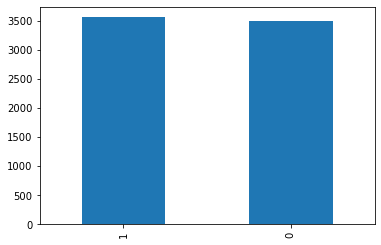

In [32]:
df['gender'].value_counts().plot(kind='bar')

<AxesSubplot:>

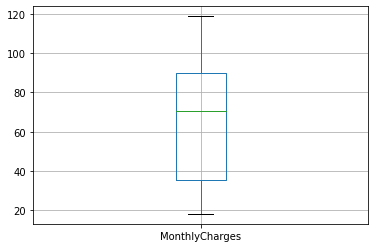

In [33]:
df.boxplot(column=['MonthlyCharges'])

Analysis:

As can be seen, the monthly charges ranges betwwen 18.25 dollars to 118.75 dollars with average of 64.76 dollars and median of 70.35 dollars, which shows that most of the people pays more than average. There seems to be no outliers (if we use interquartile range rule).

<AxesSubplot:xlabel='tenure', ylabel='MonthlyCharges'>

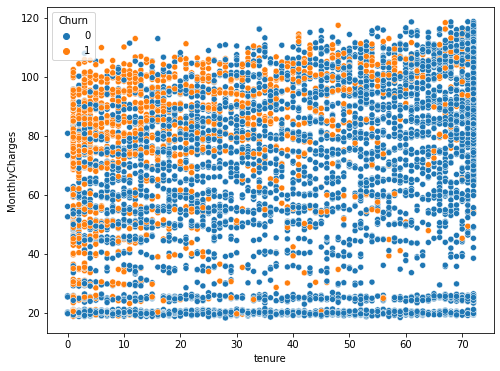

In [34]:
plt.figure(figsize=(8,6))
sns.scatterplot(x="tenure",y="MonthlyCharges",hue="Churn",data=df)

customer paying high monthlycharges for short tenures are disconnecting.
customer paying high monthlycharges for long tenures continuing with their subscription plans,as it is reasonable cost.

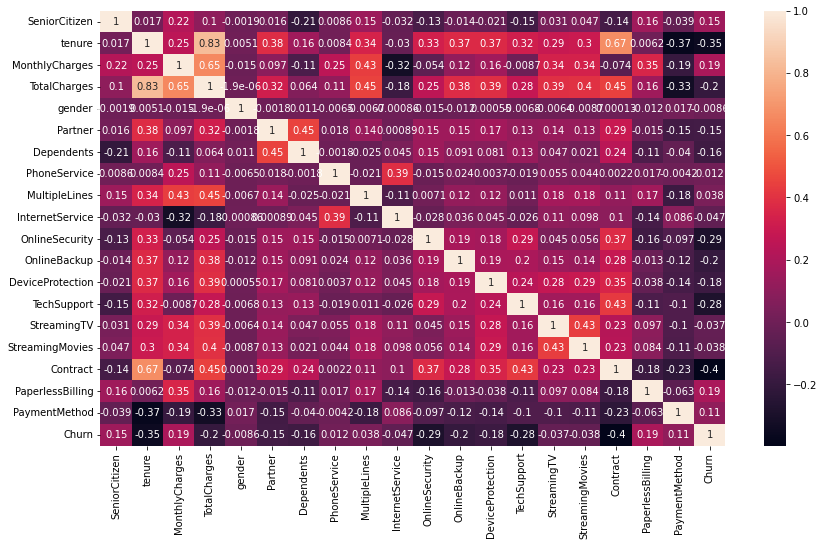

In [35]:
plt.figure(figsize=(14,8))
sns.heatmap(df.corr(),annot=True)
plt.show()

heatmap
Correlation:Dependence or association is any statistical relationship,whether casual or not ,between two random variable or bivariate data.with the help of correlation matrix,we can find interdependency between variables.
    1]least dependency of variables for predicting churn are tenure and contract.
    2]churn variable is depending more on monthly charges.